In [1]:
import pandas as pd
import os
import numpy as np
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers.convolutional import Conv2D,MaxPooling2D,ZeroPadding2D,AveragePooling2D
from keras.utils import np_utils
import skimage
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [18]:
import cv2

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray

In [4]:
os.getcwd()

'C:\\Users\\AnKajVi\\Documents'

In [5]:
os.chdir('./chest-xray-pneumonia/chest_xray/train')

In [6]:
os.getcwd()

'C:\\Users\\AnKajVi\\Documents\\chest-xray-pneumonia\\chest_xray\\train'

In [7]:
for i in os.listdir('./'):
    print(i)

NORMAL
PNEUMONIA


In [8]:
for i in os.listdir('./'):
    count=0
    for j in os.listdir('./'+i):
        count+=1
    print(i +':')
    print(count)

NORMAL:
1341
PNEUMONIA:
3875


In [9]:
v=0
b=0
for i in os.listdir('./PNEUMONIA'):
    i=i.split('_')[1]
    if(i[0]=='v'):
        v+=1
    else:
        b+=1
print(v)
print(b)

1345
2530


In [10]:
os.getcwd()

'C:\\Users\\AnKajVi\\Documents\\chest-xray-pneumonia\\chest_xray\\train'

In [11]:
def get_data(end):
    x=[]
    y=[]
    label=0
    print("Reading_Files")
    file=0
    for i in os.listdir('./'):
        if(i=='PNEUMONIA'):
            print("----PNEUMONIA------")
            #label=1
            countv=0
            countb=0
            for j in os.listdir('./'+'PNEUMONIA'):
                img_file = mpimg.imread('./'+i+'/'+j)
                img_file=rgb2gray(img_file)
                img_file = skimage.transform.resize(img_file, (100,100,1))
                img_arr = np.asarray(img_file)
                t = j.split('_')[1]
                if(t[0]=='v'):
                    if(countv<=end):
                        #label=2
                        countv+=1
                        x.append(img_arr)
                        y.append(2)
                    
                else:
                    if(countb<=end):
                        countb+=1
                        x.append(img_arr)
                        y.append(1)
                #label=1
        else:
            print("----NORMAL-----")
            #label=0
            for j in os.listdir('./'+i):
                img_file = mpimg.imread('./'+i+'/'+j)
                img_file=rgb2gray(img_file)
                img_file = skimage.transform.resize(img_file, (100,100,1))
                img_arr = np.asarray(img_file)
                x.append(img_arr)
                y.append(0)
    x = np.asarray(x)
    y = np.asarray(y)
    print("----------------READING COMPLETE--------------")
    return x,y

In [13]:
model=Sequential()
model.add(Conv2D(32,(2,2),padding='same',input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(Conv2D(64,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(128,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(Activation('relu'))
model.add(Conv2D(128,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Conv2D(256,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(512,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(512,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(3,activation='softmax'))       

[[19 19 18 ...  1  0  0]
 [19 19 18 ...  1  0  0]
 [19 19 18 ...  1  0  0]
 ...
 [10 10 10 ... 15 15 15]
 [10 10 10 ... 15 15 15]
 [10 10 10 ... 15 15 15]]


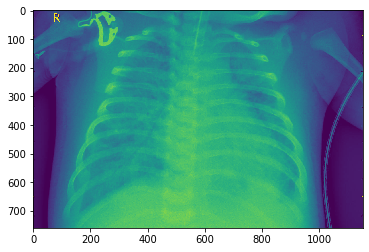

In [14]:
img = mpimg.imread("./PNEUMONIA/person1000_bacteria_2931.jpeg")
print(img)
imgplot = plt.imshow(img)

In [15]:
x,y = get_data(1300)
y=np_utils.to_categorical(y,num_classes=3)
print(y)
x,y= shuffle(x,y,random_state=13)

Reading_Files
----NORMAL-----
----PNEUMONIA------
----------------READING COMPLETE--------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [17]:
model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
filepath = 'C:\\Users\\AnKajVi\\Documents\\XraY\\nnweight-weights.{epoch:02d}-{loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
model.fit(x,y,epochs=30,batch_size=32,verbose=1,callbacks=callbacks_list)
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
3943/3943 [==============================] - 15s 4ms/step - loss: 1.1061 - acc: 0.3335

Epoch 00001: loss improved from inf to 1.10608, saving model to C:\Users\AnKajVi\Documents\XraY\nnweight-weights.01-1.11.hdf5
Epoch 2/30
3943/3943 [==============================] - 9s 2ms/step - loss: 1.1258 - acc: 0.3617

Epoch 00002: loss did not improve from 1.10608
Epoch 3/30
3943/3943 [==============================] - 9s 2ms/step - loss: 0.9600 - acc: 0.5262

Epoch 00003: loss improved from 1.10608 to 0.95998, saving model to C:\Users\AnKajVi\Documents\XraY\nnweight-weights.03-0.96.hdf5
Epoch 4/30
3943/3943 [==============================] - 9s 2ms/step - loss: 0.7578 - acc: 0.6181

Epoch 00004: loss improved from 0.95998 to 0.75777, saving model to C:\Users\AnKajVi\Documents\XraY\nnweight-weights.04-0.76.hdf5
Epoch 5/30
3943/3943 [==============================] - 9s 2ms/step - loss: 0.

[[ 0  0  0 ... 90 92 80]
 [ 0  0  0 ... 81 91 90]
 [ 0  0  0 ... 84 92 84]
 ...
 [ 8  8  1 ...  1  8  8]
 [ 0  3  8 ...  8  3  0]
 [ 0  7  0 ...  0  7  0]]
[[0.00423182 0.2846361  0.7111321 ]]
Pneumonia -> Virus


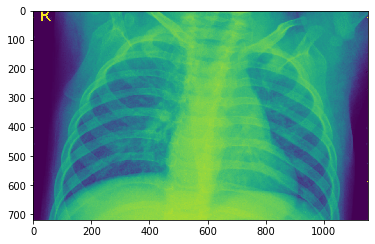

In [83]:
img = mpimg.imread("./person26_virus_60.jpeg")
print(img)
imgplot = plt.imshow(img)
img_file=rgb2gray(img)
img_file = skimage.transform.resize(img_file, (100,100,1))
img_arr = np.asarray(img_file)
x=[]
x.append(img_arr)
x = np.asarray(x)
y = model1.predict(x)
maxi=0
maxi=y[0][0]
label=0
print(y)
if(y[0][1]>=maxi):
    label=1
    maxi=y[0][1]
if(y[0][2]>=maxi):
    label=2
    maxi=y[0][2]
if(label==0):
    print("Normal")
elif(label==1):
    print("Pneumonia -> Bacteria")
elif(label==2):
    print("Pneumonia -> Virus")

[[1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[9.6064550e-01 4.7518672e-05 3.9307028e-02]]
Normal


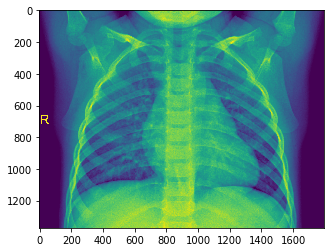

In [84]:
img = mpimg.imread("../NORMAL/NORMAL2-IM-0323-0001.jpeg")
print(img)
imgplot = plt.imshow(img)
img_file=rgb2gray(img)
img_file = skimage.transform.resize(img_file, (100,100,1))
img_arr = np.asarray(img_file)
x=[]
x.append(img_arr)
x = np.asarray(x)
y = model1.predict(x)
maxi=0
maxi=y[0][0]
label=0
print(y)
if(y[0][1]>=maxi):
    label=1
    maxi=y[0][1]
if(y[0][2]>=maxi):
    label=2
    maxi=y[0][2]
if(label==0):
    print("Normal")
elif(label==1):
    print("Pneumonia -> Bacteria")
elif(label==2):
    print("Pneumonia -> Virus")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0.5787081  0.05481318 0.36647874]]
Normal


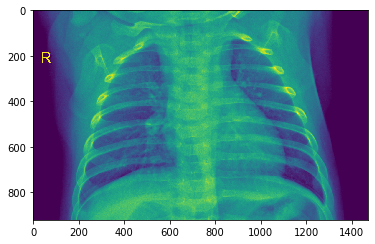

In [78]:
img = mpimg.imread("../NORMAL/NORMAL2-IM-0364-0001.jpeg")
print(img)
imgplot = plt.imshow(img)
img_file=rgb2gray(img)
img_file = skimage.transform.resize(img_file, (100,100,1))
img_arr = np.asarray(img_file)
x=[]
x.append(img_arr)
x = np.asarray(x)
y = model1.predict(x)
maxi=0
maxi=y[0][0]
label=0
print(y)
if(y[0][1]>=maxi):
    label=1
    maxi=y[0][1]
if(y[0][2]>=maxi):
    label=2
    maxi=y[0][2]
if(label==0):
    print("Normal")
elif(label==1):
    print("Pneumonia -> Bacteria")
elif(label==2):
    print("Pneumonia -> Virus")